# 1. Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6),dpi=144)  #設置畫布大小和辨識率


<Figure size 1152x864 with 0 Axes>

In [2]:
data = pd.read_csv("titanic_train.csv")

- 檢視資料

In [3]:
# data.head(10)
#data.tail(10)
data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,0,NaN,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
247,248,1,2.0,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S
67,68,0,3.0,"Crease, Mr. Ernest James",male,19.0,0,0,S.P. 3464,8.1583,NaN,S
184,185,1,3.0,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
339,340,0,1.0,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5000,T,S
271,272,1,3.0,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
252,253,0,1.0,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
836,837,0,3.0,"Pasic, Mr. Jakob",male,21.0,0,0,315097,8.6625,NaN,S
335,336,0,3.0,"Denkoff, Mr. Mitto",male,NaN,0,0,349225,7.8958,NaN,S
537,538,1,1.0,"LeRoy, Miss. Bertha",female,30.0,0,0,PC 17761,106.4250,NaN,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         853 non-null float64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 83.6+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,853.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.304807,30.154300,0.545455,0.381594,32.204208
std,257.353842,0.486592,0.835502,16.591337,1.281199,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.750000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,200.000000,20.000000,6.000000,512.329200


In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass          38
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2. EDA

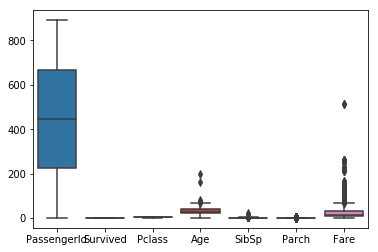

In [8]:
sns.boxplot(data= data)

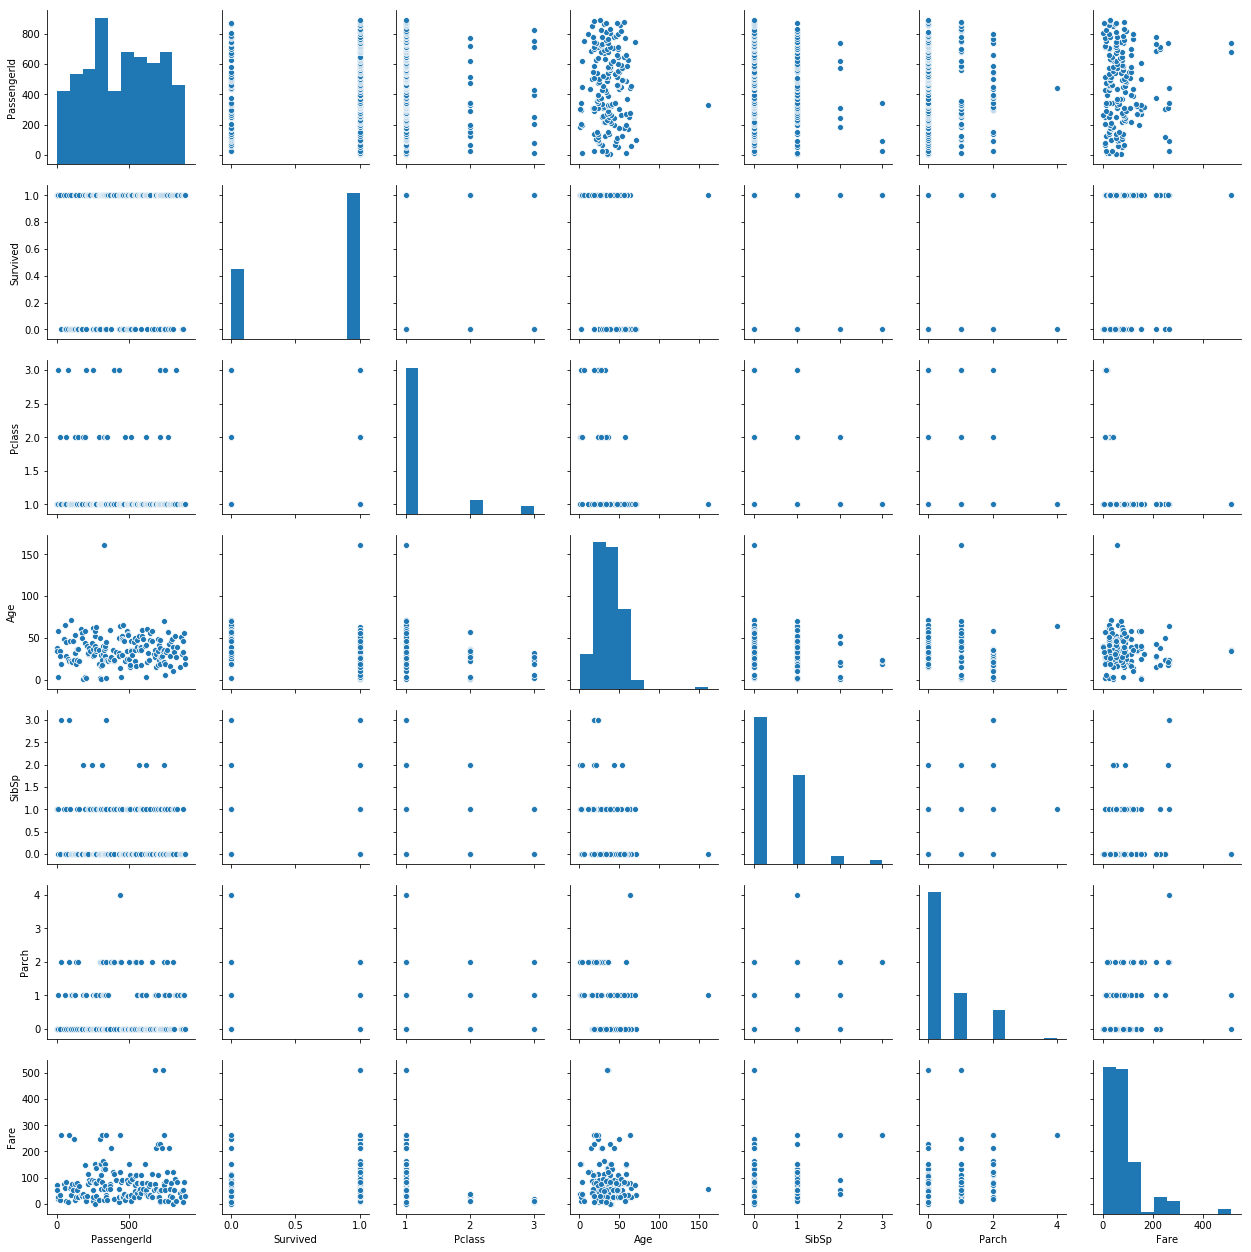

In [9]:
sns.pairplot(data.dropna())

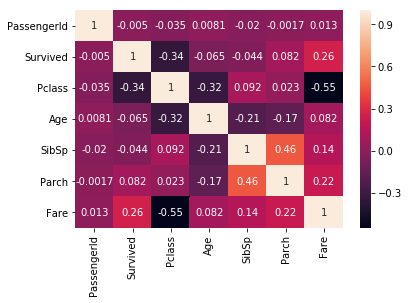

In [10]:
corr = data.corr()
sns.heatmap(corr, annot=True)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


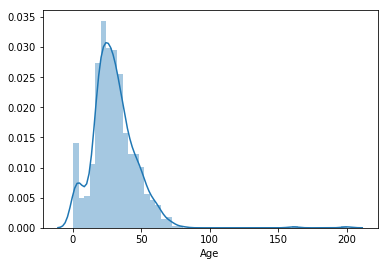

In [11]:
sns.distplot(data.Age.dropna())

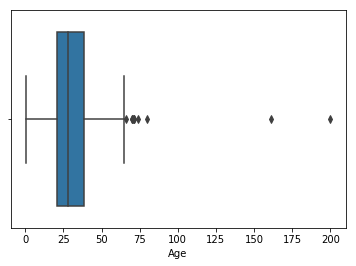

In [12]:
sns.boxplot(data.Age.dropna())

# 3. Preprocess

- 補 NA
- Encoding

In [13]:
df = data.copy()

In [14]:
df.drop(df[df.Age > 100].index, inplace= True)

In [15]:
def get_pclass_by_Fare(row):
    if np.isnan(row.Pclass):
        if row.Fare>50:
            return 1
        elif row.Fare>17:
            return 2
        else:
            return 3
    else:
        return row.Pclass


In [16]:
df['Pclass'] = df.apply(get_pclass_by_Fare, axis = 1)

In [17]:
df['Age'] = df.groupby(['Sex','Pclass']).Age.apply(lambda x: x.fillna(x.mean()))

In [18]:
df['Embarked'].fillna(df.Embarked.mode()[0], inplace = True)

### 補直完記得再檢查一次分布狀況

In [19]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          686
Embarked         0
dtype: int64

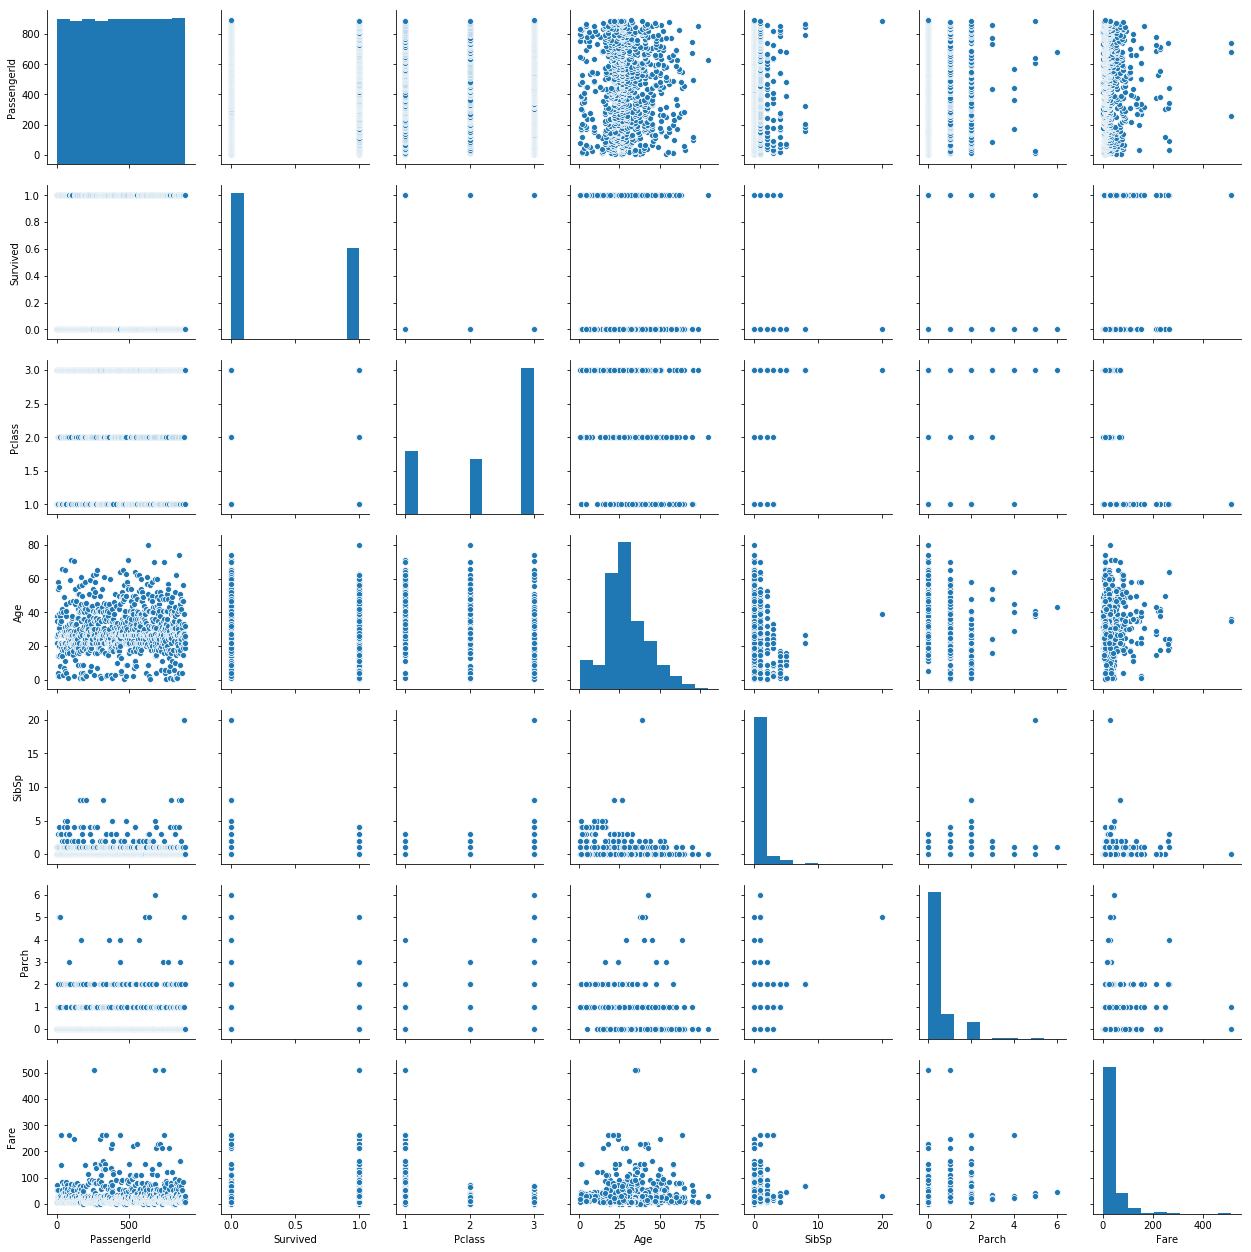

In [20]:
sns.pairplot(df)

In [21]:
df.drop(df[df.SibSp > 10].index, inplace= True)

#### encoding
- label encoding
- one hot encoding

In [22]:
df['Sex'] = df.Sex.map({"female":0, "male":1}).astype(int)
df['Embarked'] = df.Embarked.map({"C":0, "S":1, "Q":2}).astype(int)

In [23]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         0
dtype: int64

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3.0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3.0,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1
4,5,0,3.0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1


# 4. Model

### 4-1. 切資料集

In [25]:
from sklearn.model_selection import train_test_split
# train_cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
train_cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

X_train, X_test, y_train, y_test = train_test_split(df[train_cols], df['Survived'], test_size=0.3, random_state=400)

### 4-2. 選擇模型

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


### 4-3. fit model

In [27]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

### 4-4. 評估模型

In [28]:
from sklearn import metrics
print("accuracy:%.2f"% metrics.accuracy_score(y_test, pred))

accuracy:0.82


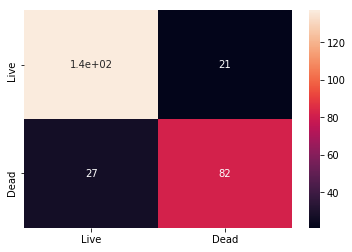

In [29]:
confusion_matrix = metrics.confusion_matrix(y_true= y_test, y_pred=pred)
cm =pd.DataFrame(confusion_matrix , index = ['Live', 'Dead'], columns = [ 'Live', 'Dead'])
sns.heatmap(cm, annot = True)  

# 5. Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score
clf = LogisticRegression()
scores = cross_val_score(clf, df[train_cols], df['Survived'], cv=3)
np.mean(scores)

0.7939287515558702